<a href="https://www.kaggle.com/code/marwaelsherif/titanic-notebook?scriptVersionId=118601580" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test=test.drop(columns=['Cabin'],axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Exploratory Data Analysis

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

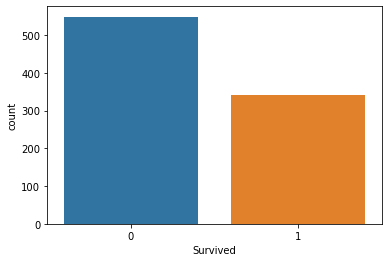

In [8]:
# visualize categorical attributes
sns.countplot(train['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

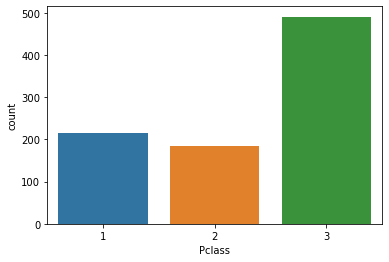

In [9]:
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

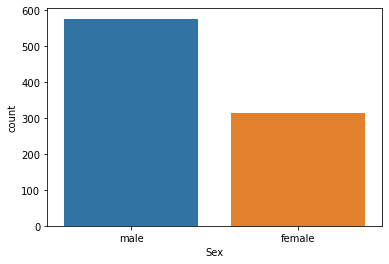

In [10]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

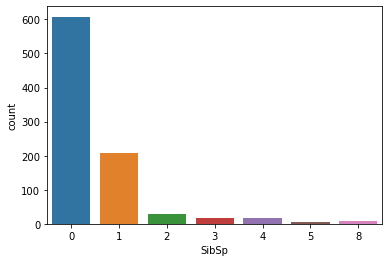

In [11]:
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

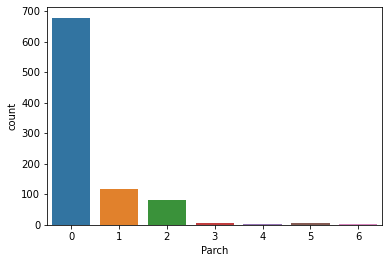

In [12]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

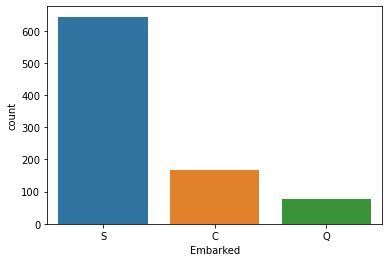

In [13]:
sns.countplot(train['Embarked'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

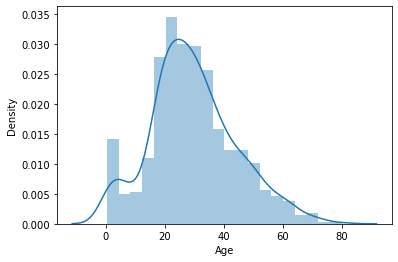

In [14]:
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

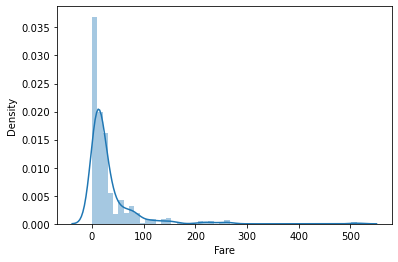

In [15]:
sns.distplot(train['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

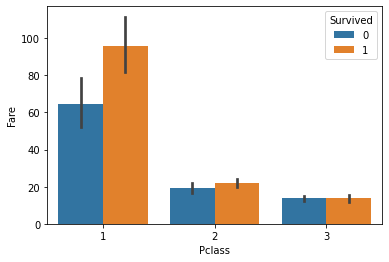

In [16]:
sns.barplot(data=train,x=train['Pclass'],y=train['Fare'],hue=train['Survived'])

In [17]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,NaN,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1105
Embarked          2
dtype: int64

In [20]:
df=df.drop(columns=['Cabin','Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


# Log Transform

In [21]:
df['Fare']=np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

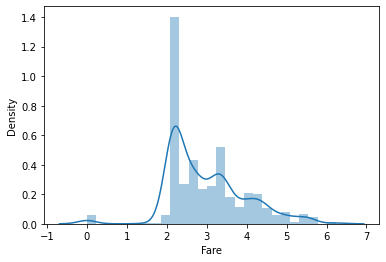

In [22]:
sns.distplot(df['Fare'])

In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [24]:
#dealing with nulls for categorical data
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
#dealing with nulls for numerical data

df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [26]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [27]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

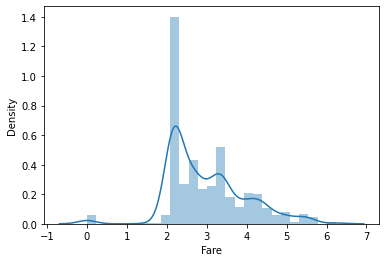

In [28]:
sns.distplot(df['Fare'])

# Correlation Matrix

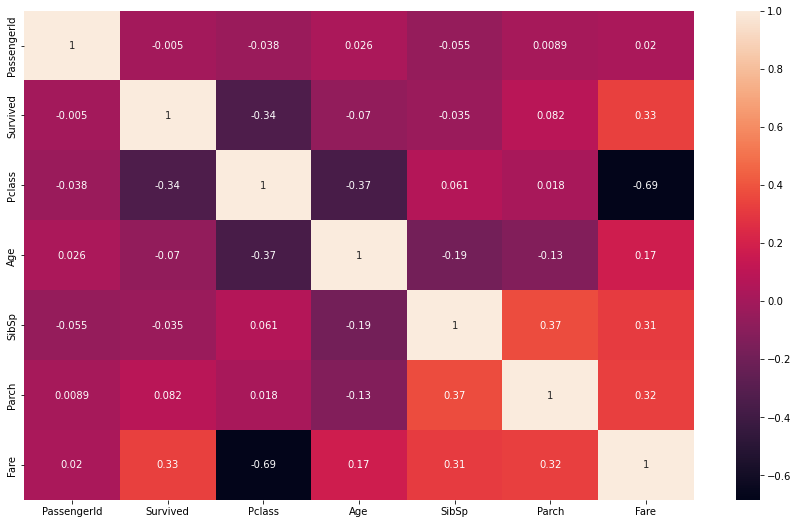

In [29]:
corr = df.corr()
plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True)
plt.show()



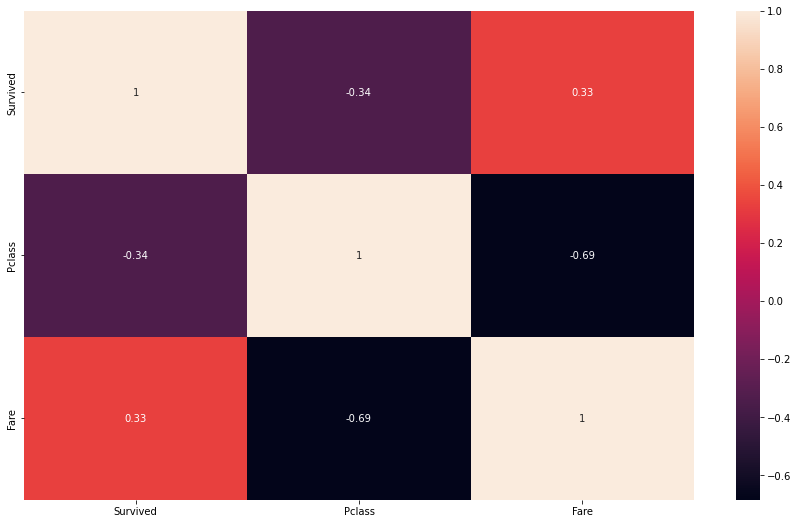

Index(['Pclass', 'Fare'], dtype='object')


In [30]:
top_feature = corr.index[abs(corr['Survived']) >= 0.1]
top_corr = df[top_feature].corr()
plt.subplots(figsize=(15, 9))
sns.heatmap(top_corr, annot=True)
plt.show()
top_feature = top_feature.delete(0)
print(top_feature)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


# Label Encoder

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.2+ KB


In [33]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()
for c in cols:
    df[c]=le.fit_transform(df[c])


In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Embarked     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


# Train_Test_Split

In [36]:
train=df.iloc[:train_len,:]
test =df.iloc[train_len:,:]

In [37]:
train=train.drop(columns=['PassengerId'])

In [38]:
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,2.110213,2
1,1.0,1,0,38.0,1,0,4.280593,0
2,1.0,3,0,26.0,0,0,2.188856,2
3,1.0,1,0,35.0,1,0,3.990834,2
4,0.0,3,1,35.0,0,0,2.202765,2


In [39]:

test=test.drop(columns=['Survived'])

In [40]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,3,1,34.5,0,0,2.178064,1
892,893,3,0,47.0,1,0,2.079442,2
893,894,2,1,62.0,0,0,2.369075,1
894,895,3,1,27.0,0,0,2.268252,2
895,896,3,0,22.0,1,1,2.586824,2


In [41]:
X=train.drop(columns=['Survived'])
Y=train['Survived']

In [42]:
from sklearn.model_selection import train_test_split , cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score
def model_selection(model,X,Y):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    print("accuracy= ",accuracy_score(y_test,ypred))
    
    score=cross_val_score(model,X,Y,cv=5)
    print('CV Score:', np.mean(score))
    

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model_selection(model,X,Y)

accuracy=  0.8071748878923767
CV Score: 0.7833971502102819


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model_selection(model,X,Y)

accuracy=  0.7802690582959642
CV Score: 0.7755633670202748


In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_selection(model,X,Y)

accuracy=  0.7219730941704036
CV Score: 0.7733098989391752


In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_selection(model,X,Y)

accuracy=  0.7847533632286996
CV Score: 0.8081162513338773


In [47]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model_selection(model,X,Y)

accuracy=  0.7982062780269058
CV Score: 0.7957504237022157


In [48]:
from xgboost import XGBClassifier
model = XGBClassifier()
model_selection(model,X,Y)

accuracy=  0.7892376681614349
CV Score: 0.8125980792166217


# Hyperparameter Tuning

In [49]:
estimator = XGBClassifier()
param_grid = {'n_estimators': [100, 150],
              'max_depth': [1, 2],
              'learning_rate': [0.1, 0.01],
              'min_child_weight': [3, 4],
              'subsample': [0.6, 0.7],
              'colsample_bytree': [0.2, 0.3]}
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,test_size=0.25,random_state=42)
rscv = RandomizedSearchCV(estimator,param_grid,cv = 5)
rscv.fit(x_train,y_train)
rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [50]:
rscv.best_params_

{'subsample': 0.6,
 'n_estimators': 150,
 'min_child_weight': 3,
 'max_depth': 2,
 'learning_rate': 0.1,
 'colsample_bytree': 0.3}

In [51]:
model = XGBClassifier(subsample = 0.6, n_estimators= 100,
                    min_child_weight = 4, max_depth= 1,
                    learning_rate= 0.1, colsample_bytree= 0.3)
model_selection(model,X,Y)

accuracy=  0.7802690582959642
CV Score: 0.8047329106772958


In [52]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model_selection(model,X,Y)

accuracy=  0.8116591928251121
CV Score: 0.8238277572029377


# training in all dataset

In [53]:
model = LGBMClassifier()
model.fit(X, Y)

LGBMClassifier()

In [54]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,3,1,34.5,0,0,2.178064,1
892,893,3,0,47.0,1,0,2.079442,2
893,894,2,1,62.0,0,0,2.369075,1
894,895,3,1,27.0,0,0,2.268252,2
895,896,3,0,22.0,1,1,2.586824,2


In [55]:
X_test = test.drop(columns=['PassengerId'], axis=1)

In [56]:
X_test.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [57]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,3,1,34.5,0,0,2.178064,1
892,893,3,0,47.0,1,0,2.079442,2
893,894,2,1,62.0,0,0,2.369075,1
894,895,3,1,27.0,0,0,2.268252,2
895,896,3,0,22.0,1,1,2.586824,2


# Test Submission


In [59]:
sub=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')


In [60]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [61]:
sub['Survived']=pred.astype(int)

In [62]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [63]:
sub.to_csv('submission.csv',index=False)